In [40]:
%matplotlib inline
import imp
import pandas as pd
import seaborn
import numpy as np

In [5]:
from utils import add_forest_areas

add_forest_areas('./data/FOR_PUBL_FR_SE.json', './data/FOR_PUBL_FR_SE_A.json')

In [64]:
fires = pd.read_csv('./data/liste_incendies_ du_29_01_2020.csv', sep=';', skiprows=2)

In [65]:
fires.head()

,Année,Numéro,Type de feu,Département,Code INSEE,Commune,Lieu-dit,Code du carreau DFCI,Alerte,Origine de l'alerte,Surface parcourue (m2)
0,1973,6389,9,66,66196,Sorède,piste dfci al33 mas berdaguer,GC42F25,1973-01-07 12:41:00,3.0,NaN
1,1973,8,0,06,06060,Falicon,FALICON,R21B03,1973-01-09 13:50:00,3.0,10000.0
2,1973,6102,9,84,84078,Mondragon,NaN,N20H16,1973-01-12 18:35:00,NaN,0.0
3,1973,6106,9,84,84140,Vaugines,NaN,O21C16,1973-01-13 18:30:00,NaN,0.0
4,1973,4789,9,34,34078,Claret,NaN,M21G13,1973-01-21 16:00:00,NaN,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13f685b00>]],
      dtype=object)

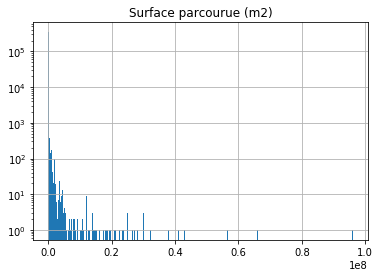

In [66]:
fires[fires['Surface parcourue (m2)']<1e+08].hist('Surface parcourue (m2)', bins = 1000, log=True)

In [67]:
fires.describe()

,Année,Numéro,Type de feu,Origine de l'alerte,Surface parcourue (m2)
count,490401.000000,490401.000000,490401.000000,230880.000000,3.525530e+05
mean,1993.928236,5831.041370,6.906146,3.044287,2.632287e+04
std,13.000699,4048.885052,3.802695,0.826726,5.987885e+05
min,1973.000000,1.000000,0.000000,1.000000,0.000000e+00
25%,1983.000000,2611.000000,9.000000,3.000000,0.000000e+00
50%,1991.000000,5226.000000,9.000000,3.000000,0.000000e+00
75%,2005.000000,8192.000000,9.000000,3.000000,1.000000e+03
max,2020.000000,19751.000000,9.000000,6.000000,1.158000e+08


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


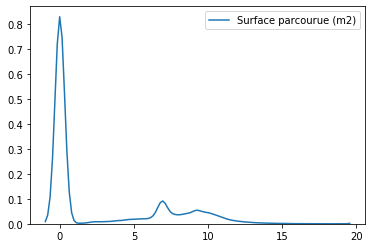

In [75]:
logSurf = np.log10(np.clip(fires['Surface parcourue (m2)'], a_min=1, a_max=None))
seaborn.kdeplot(logSurf)

In [74]:
np.log(5e5)

13.122363377404328

In [83]:
fires['Surface parcourue (m2)'][(fires['Surface parcourue (m2)'].isna()) | (fires['Surface parcourue (m2)'] == 0)].shape[0]/fires.shape[0]

0.7673495771827545

In [85]:
.shape[0]/fires.shape[0]

0.7673495771827545

In [89]:
fires[(fires['Type de feu']==0) & (fires['Surface parcourue (m2)']== 0)].shape

(0, 11)